In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('.\showwcase_sessions.csv')
print('sample and feature in CSV: ', df.shape)
df.head()

sample and feature in CSV:  (302, 14)


,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


There are 302 samples and 14 feature

In [3]:
# Check all the columns
print(df.columns)

Index(['session_id', 'customer_id', 'login_date', 'projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured',
       'session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration'],
      dtype='object')


Show all the feature

In [4]:
# Remove null data
df = df.dropna(axis=0)
print(df.shape)

(299, 14)


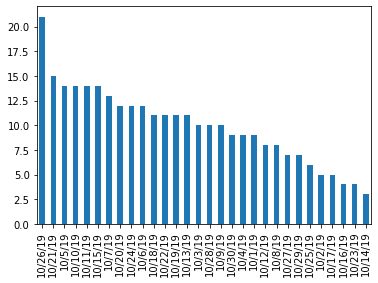

In [5]:
df['login_date'].value_counts().plot.bar()

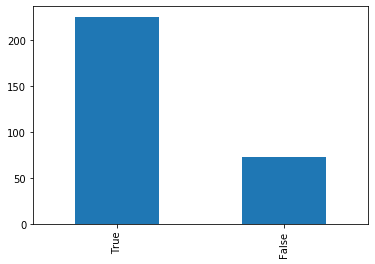

In [6]:
df['projects_added'].value_counts().plot.bar()

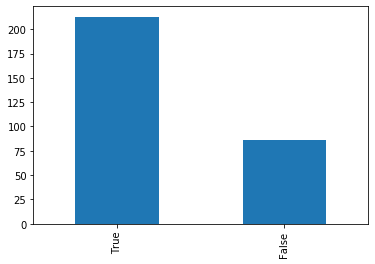

In [7]:
df['likes_given'].value_counts().plot.bar()

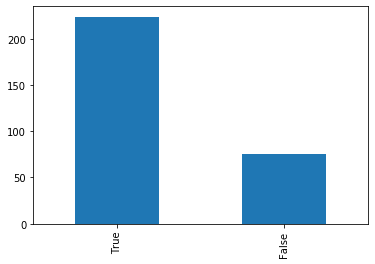

In [8]:
df['comment_given'].value_counts().plot.bar()

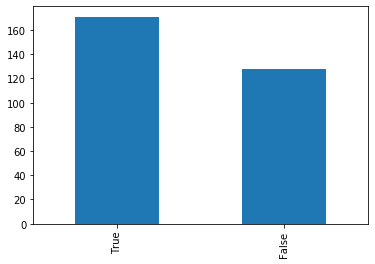

In [9]:
df['inactive_status'].value_counts().plot.bar()

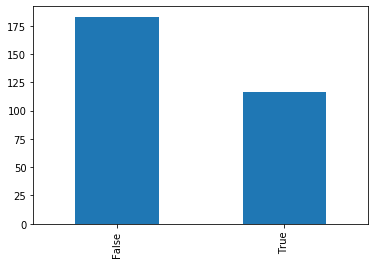

In [10]:
df['bug_occured'].value_counts().plot.bar()

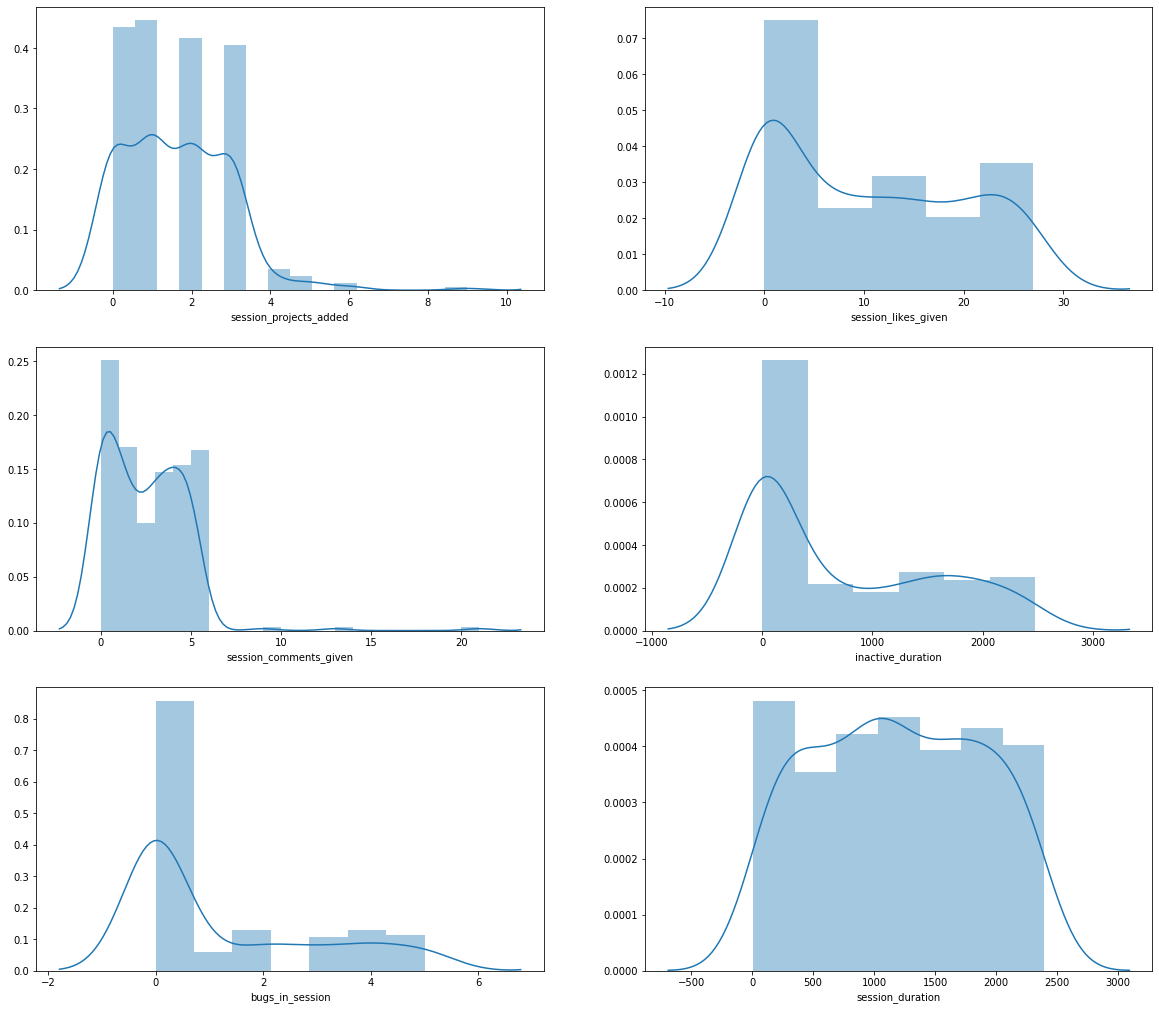

In [11]:
# Feature distribution for last 6 columns
fig = plt.figure(figsize=(20,24))
loc = 1
for i in df.drop(['session_id', 'customer_id','login_date', 'projects_added','likes_given',
                  'comment_given', 'inactive_status', 'bug_occured'],axis=1).columns:
    ax = fig.add_subplot(4,2,loc)
    loc+=1
    sns.distplot(df[i],ax=ax)

In [12]:
# Remove duplicates data
df = df.drop_duplicates([ 'session_id', 'customer_id', 'login_date', 'projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured',
       'session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration'])
print("Samples and Features in Dataset : ",df.shape)

Samples and Features in Dataset :  (299, 14)


In [13]:
# Convert True and False to 1 and 0
df1 = df
df1[['projects_added', 'likes_given', 'comment_given', 'inactive_status', 
     'bug_occured']] = df[['projects_added', 'likes_given', 'comment_given', 'inactive_status', 'bug_occured']].astype(int)
df1

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,0,1,1,1,0,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,1,1,1,1,0,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,1,1,1,1,0,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,1,1,1,0,0,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,1,1,0,1,0,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,10/1/19,1,1,0,1,0,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,1,0,0,1,0,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,1,0,0,1,0,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,1,0,0,1,0,1.0,0.0,0.0,139.0,0.0,1113.0


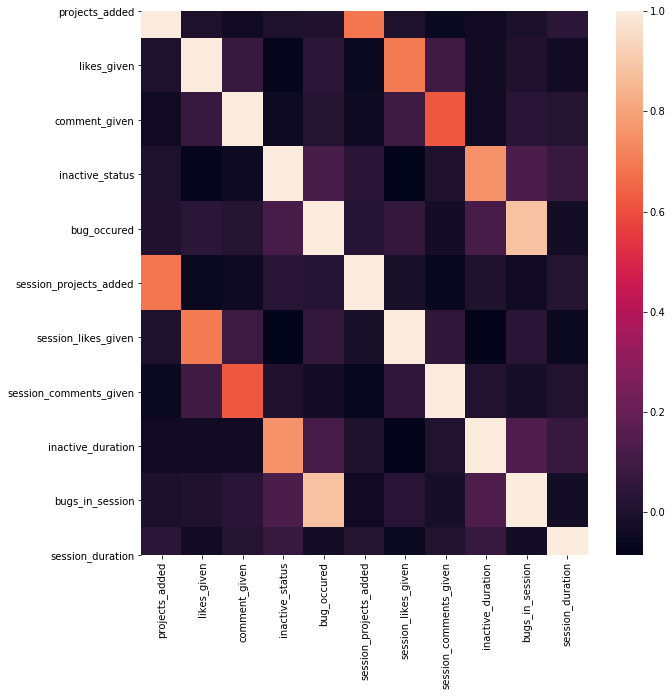

In [14]:
#create correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(['session_id', 'customer_id'],axis=1).corr())

Based on the heatmap above, I am going to analyze purple color. White and red color are not necessary for analysis because they are comparing exactly same thing or itself. 

In [15]:
# Inactive Status VS. Bug Occured
df1['inactive_status'].value_counts()

1    171
0    128
Name: inactive_status, dtype: int64

In [16]:
tt = 0 
tf = 0
ft = 0 
ff = 0

inactive_status = df1['inactive_status'].values.tolist()
bug_occured = df1['bug_occured'].values.tolist()


for i in range(len(inactive_status)):
    if inactive_status[i] == True and bug_occured[i] == True:
        tt += 1
    elif inactive_status[i] == True and bug_occured[i] == False:
        tf += 1
    elif inactive_status[i] == False and bug_occured[i] == True:
        ft += 1
    elif inactive_status[i] == False and bug_occured[i] == False:
        ff += 1

print('Inactive status and bug occured ：', tt)
print('Inactive status and bug not occured ：', tf)
print('active status and bug occured ：', ft)
print('active status and bug not occured ：', ff)

Inactive status and bug occured ： 75
Inactive status and bug not occured ： 96
active status and bug occured ： 41
active status and bug not occured ： 87


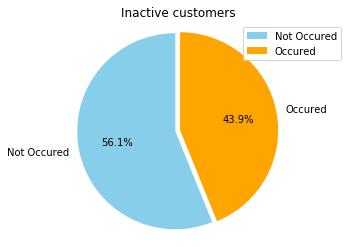

In [17]:
# Numbers of bugs occured in Inactive customers
label_list = ['Not Occured', 'Occured']    
size = [tf,tt]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Inactive customers")
plt.legend()
plt.show()


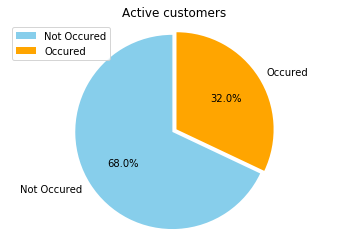

In [18]:
# Numbers of bugs occured in active customers
label_list = ['Not Occured', 'Occured']    
size = [ff,ft]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Active customers")
plt.legend()
plt.show()

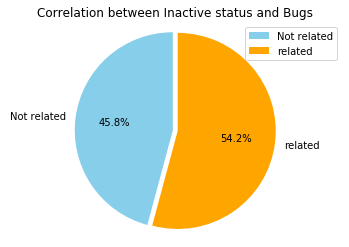

In [19]:
# Correlation between Inactive status and bugs
label_list = ['Not related', 'related']    
size = [tf+ft,tt+ff]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Correlation between Inactive status and Bugs")
plt.legend()
plt.show()

Based on pie charts above, I believe bug occured has correlation with inactive status.

In [20]:
# Inactive Status VS. Comment Given
tg = 0
tng = 0
fg = 0 
fng = 0


comment_given = df1['comment_given'].values.tolist()


for i in range(len(inactive_status)):
    if inactive_status[i] == True and comment_given[i] == True:
        tg += 1
    elif inactive_status[i] == True and comment_given[i] == False:
        tng += 1
    elif inactive_status[i] == False and comment_given[i] == True:
        fg += 1
    elif inactive_status[i] == False and comment_given[i] == False:
        fng += 1

print('Inactive status and given comment : ', tg)
print('Inactive status and not given comment : ', tng)
print('active status and given comment : ', fg)
print('active status and not given comment : ', fng)

Inactive status and given comment :  125
Inactive status and not given comment :  46
active status and given comment :  99
active status and not given comment :  29


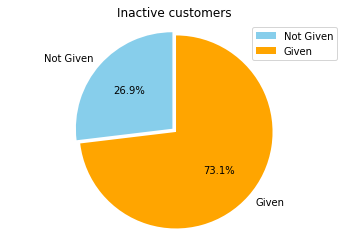

In [21]:
# Numbers of comment given in Inactive customers
label_list = ['Not Given', 'Given']    
size = [tng,tg]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Inactive customers")
plt.legend()
plt.show()

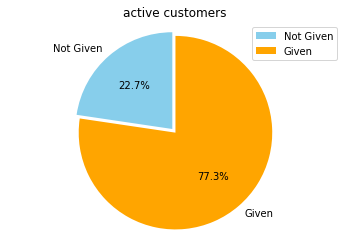

In [22]:
# Numbers of comment given in active customers
label_list = ['Not Given', 'Given']    
size = [fng,fg]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("active customers")
plt.legend()
plt.show()

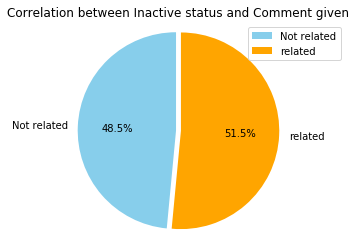

In [23]:
# Correlation between Inactive status and comment given
label_list = ['Not related', 'related']    
size = [fg+tng, tg+fng]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Correlation between Inactive status and Comment given")
plt.legend()
plt.show()

As we see, inactive status has slightly connection with comment given

In [24]:
# Inactive Status VS. Like Given
tl = 0
tnl = 0
fl = 0 
fnl = 0


likes_given = df1['likes_given'].values.tolist()


for i in range(len(inactive_status)):
    if inactive_status[i] == True and likes_given[i] == True:
        tl += 1
    elif inactive_status[i] == True and likes_given[i] == False:
        tnl += 1
    elif inactive_status[i] == False and likes_given[i] == True:
        fl += 1
    elif inactive_status[i] == False and likes_given[i] == False:
        fnl += 1

print('Inactive status and given like : ', tl)
print('Inactive status and not given like : ', tnl)
print('active status and given like : ', fl)
print('active status and not given like : ', fnl)

Inactive status and given like :  117
Inactive status and not given like :  54
active status and given like :  96
active status and not given like :  32


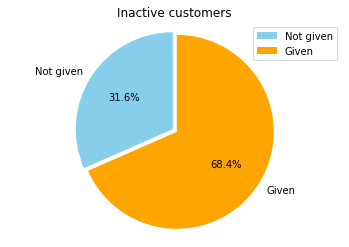

In [25]:
# Numbers of like given in Inactive customers
label_list = ['Not given', 'Given']    
size = [tnl,tl]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Inactive customers")
plt.legend()
plt.show()

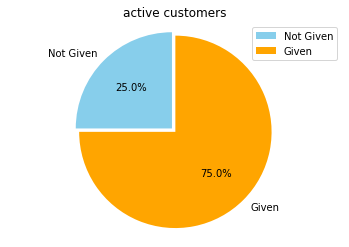

In [26]:
# Numbers of like given in active customers
label_list = ['Not Given', 'Given']    
size = [fnl,fl]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("active customers")
plt.legend()
plt.show()

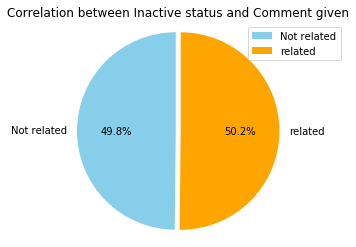

In [27]:
# Correlation between Inactive status and like given
label_list = ['Not related', 'related']    
size = [tl+fnl,fl+tnl]    
colors = ['skyblue','orange']     
explode = [0.05, 0]   

patches, l_text, p_text = plt.pie(size, explode=explode,labels=label_list,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis("equal")    
plt.title("Correlation between Inactive status and Comment given")
plt.legend()
plt.show()

Obviously, inactive statue has less related to like given.